# Lab 4.1 Keypoint Detection

In this lab you will implement keypoint detection using the DoG filter as described in class.

In [28]:
import numpy as np
import imageio
from skimage.color import rgb2gray
from scipy.ndimage import gaussian_filter, maximum_filter, minimum_filter
import matplotlib as mpl
from matplotlib import pyplot as plt

In [29]:
sigma = 1     # initial sigma value
nblur = 10    # number of images in scale space stack
thresh = 0.1  # minimum DoG response threshold for keypoint detections

# build the list of blur kernel sigma values
sigmas = [sigma*((1.5)**i) for i in range(nblur+1)]

1. Load the `sunflowers.jpg` image, convert to grayscale using `rgb2gray` and show it.

/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_9594/3480978128.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('sunflowers.jpg')


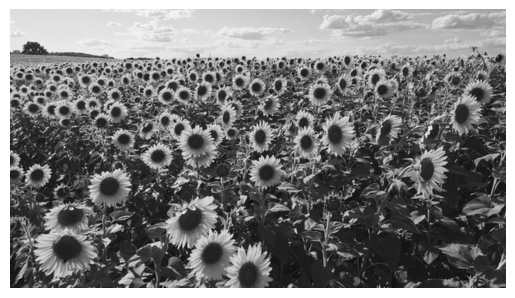

In [30]:
# load the sunflowers.jpg images, convert to grayscale using rgb2gray and show it
image = imageio.imread('sunflowers.jpg')
image = rgb2gray(image)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

2. Build the scale space stack:

- Blur the image with each sigma value in the `sigmas` array using the `gaussian_filter` function.
- Compute the difference of successive images.

You should end up with `nblur` difference images (response 0 - response 1, response 1 - response 2, ...) stacked into a 3D array $(N \times H \times W$).

In [31]:
blurred_images = [gaussian_filter(img, sigma=s) for s in sigmas]

dog_stack = np.zeros((nblur, img.shape[0], img.shape[1]), dtype=img.dtype)

# compute the Difference of Gaussian (DoG) stack
for i in range(nblur):
    dog_stack[i] = blurred_images[i+1] - blurred_images[i]

print("DoG stack shape:", dog_stack.shape) # (nblur, height, width)

DoG stack shape: (10, 1248, 2220)


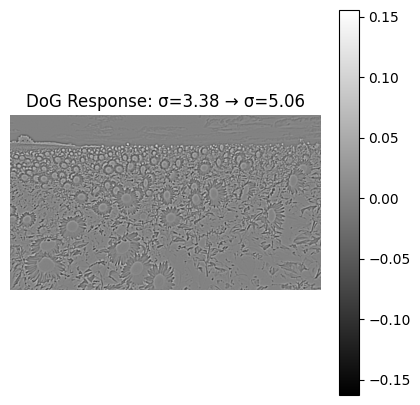

In [32]:
plt.figure(figsize=(5,5))
plt.imshow(dog_stack[3], cmap='gray')
plt.title(f"DoG Response: σ={sigmas[3]:.2f} → σ={sigmas[4]:.2f}")
plt.axis('off')
plt.colorbar()
plt.show()

3. Run 3D non-maxima supression:

- Compute the result of `minimum_filter` and `maximum_filter` on your DoG stack using `size=3`.  These will compute the minimum and maximum of the filter reponse over a 3x3x3 window.  (Do not run the filters on each image separately; use the entire 3D stack as input to the filter functions.)
- Create a Boolean array which is `True` where:
  - The response equals the local min or max and
  - the absolute value (`np.abs`) of the response is above `thresh`.
  - *(Hint: use the `|` and `&` operators here.)*
- Use `np.argwhere` to find locations where the Boolean array is `True` and store the results in `features`.  These are your detected keypoints.

In [33]:
localMin = minimum_filter(dog_stack, size=3)
localMax = maximum_filter(dog_stack, size=3)

mask = (((dog_stack == localMin) | (dog_stack == localMax)) & 
        (np.abs(dog_stack) > thresh))

features = np.argwhere(mask)
print("Number of features detected:", features.shape[0])

Number of features detected: 921


4. Use the following code to draw circles on the image corresponding to your keypoints.

Once your code is working, try it on an image of your choice and see where it puts the keypoints.  You might need to adjust parameters at the top of the notebook to optimize the results.

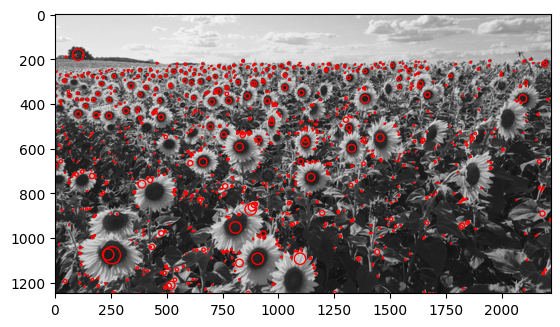

In [34]:
fig,ax = plt.subplots()
ax.imshow(image,cmap='gray')
for feature in features:
    scale,y,x = feature
    circle = mpl.patches.Circle((x,y),sigmas[scale],fill=False,color='red')
    ax.add_patch(circle)